In [47]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data2/Sdf16_1a.txt', sep='\t')

/Users/sarthak/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


# Problem 1

Rank and visualize the states that take in the most federal funding (revenue).
Which states spend the most federal funding per student?

In [37]:
states = df[['STNAME', 'TFEDREV', 'TOTALEXP', 'V33']]
states = states.groupby(['STNAME']).sum().reset_index().sort_values(by='TFEDREV')
states['TotalPerStudent'] = states['TOTALEXP'] / states['V33'] 
states.head()

,STNAME,TFEDREV,TOTALEXP,V33,TotalPerStudent
45,Vermont,111890912,2102744912,86273,24373.151647
50,Wyoming,123011974,2034228974,94709,21478.729308
7,Delaware,144706995,2218344995,134840,16451.683440
34,North Dakota,155452961,1963629961,108530,18092.969326
29,New Hampshire,169165780,3124777780,179514,17406.875118


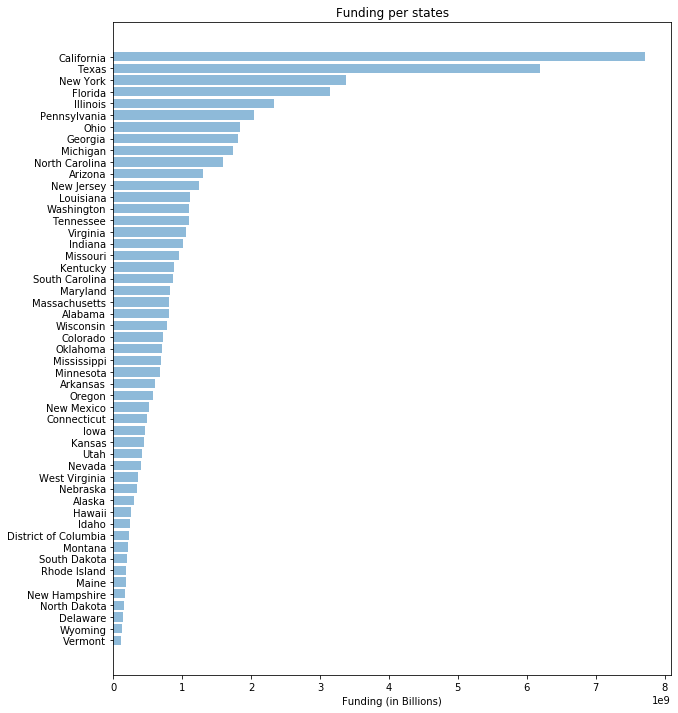

Top 10 states with highest spending per students are


,STNAME,TotalPerStudent
0,District of Columbia,27321.558193
1,New York,25234.981198
2,Vermont,24373.151647
3,New Jersey,21640.774037
4,Wyoming,21478.729308
5,Connecticut,20976.924089
6,Alaska,19799.769017
7,Pennsylvania,19216.042560
8,Massachusetts,18335.450837
9,North Dakota,18092.969326


In [41]:
plt.figure(figsize=(10,12))
plt.barh(states['STNAME'], states['TFEDREV'], align='center', alpha=0.5)
y_pos = np.arange(len(states))
plt.yticks(y_pos, states['STNAME'])
plt.xlabel('Funding (in Billions)')
plt.title('Funding per states')
plt.show()
print('Top 10 states with highest spending per students are')
states.sort_values(by='TotalPerStudent', ascending=False).head(10).reset_index()[['STNAME', 'TotalPerStudent']]

# Problem 2
Visualize the relationship between school districts’ total revenue and expenditures.
Which states have the most debt per student?

In [83]:
districts = df[['LEAID', 'NAME','TOTALREV', 'TOTALEXP', '_41F', '_66V', 'V33']]
districts = districts[districts['TOTALREV'] > 0]
districts = districts[districts['V33'] > 0]
districts['SpendRate'] = districts['TOTALEXP'] / districts['TOTALREV']
districts['TotalDebt'] = districts['_41F'] + districts['_66V']
districts['TotalDebtPerStudent'] = districts['TotalDebt'] / districts['V33']
districts.head()

,LEAID,NAME,TOTALREV,TOTALEXP,_41F,_66V,V33,SpendRate,TotalDebt,TotalDebtPerStudent
1,100005,Albertville City,49795000,46778000,34381000,0,5214,0.939412,34381000,6593.977752
2,100006,Marshall County,56422000,64739000,27766000,0,5635,1.147407,27766000,4927.417924
3,100007,Hoover City,168040000,165436000,288730000,0,13910,0.984504,288730000,20757.009346
4,100008,Madison City,105927000,101154000,120371000,0,10011,0.954941,120371000,12023.873739
6,100011,Leeds City,27699000,32285000,37833000,0,1905,1.165566,37833000,19859.842520


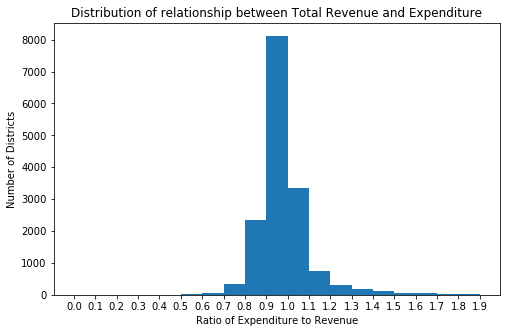

Top 10 states with most debt spending per students are


,NAME,TotalDebtPerStudent
0,Quitman County,730599.369085
1,NETT LAKE PUBLIC SCHOOL DISTRICT,289420.560748
2,West-MEC - Western Maricopa Education Center,173384.798100
3,MOSQUERO MUNICIPAL SCHOOLS,138000.000000
4,CRAIG CO PBLC SCHS,137027.287319
5,IVANHOE PUBLIC SCHOOL DISTRICT,132250.000000
6,MIAMI ISD,130281.690141
7,WILDORADO ISD,120291.262136
8,RANKIN ISD,112989.323843
9,Emery Unified,100957.020057


In [103]:
plt.figure(figsize=(8,5))
plt.hist(districts['SpendRate'].values, bins=np.arange(0, 2, 0.1))
plt.xticks(np.arange(0, 2, 0.1))
plt.xlabel('Ratio of Expenditure to Revenue')
plt.ylabel('Number of Districts')
plt.title('Distribution of relationship between Total Revenue and Expenditure')
plt.show()
print('Top 10 states with most debt spending per students are')
districts.sort_values(by='TotalDebtPerStudent', ascending=False).head(10) \
                .reset_index()[['NAME', 'TotalDebtPerStudent']]


# Problem 3
The district-level performance metrics from EDFacts may be useful in your decision.
However, to protect student privacy, the data in these datasets has been heavily “blurred” to prevent students
from being identified. Therefore, most of the numeric metrics are presented as ranges in string format. In
addition, censored and missing data must be imputed.
Write and explain a function for processing a single column of “blurred” metrics into usable numeric values.
Use it to process and then visualize the distribution of a performance metric of your choice.

In [86]:
language_df = pd.read_csv('../data2/rla-achievement-lea-sy2016-17.csv')
language_df.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_RLA00NUMVALID_1617,ALL_RLA00PCTPROF_1617,MAM_RLA00NUMVALID_1617,MAM_RLA00PCTPROF_1617,...,MIG_RLA05NUMVALID_1617,MIG_RLA05PCTPROF_1617,MIG_RLA06NUMVALID_1617,MIG_RLA06PCTPROF_1617,MIG_RLA07NUMVALID_1617,MIG_RLA07PCTPROF_1617,MIG_RLA08NUMVALID_1617,MIG_RLA08PCTPROF_1617,MIG_RLAHSNUMVALID_1617,MIG_RLAHSPCTPROF_1617
0,ALABAMA,1,100005,AL-101,Albertville City,12APR18,2797,28,3,PS,...,22,LE20,22,LE20,18,21-39,14,LT50,20,LE20
1,ALABAMA,1,100006,AL-048,Marshall County,12APR18,2969,34,11,GE50,...,5,PS,4,PS,1,PS,3,PS,3,PS
2,ALABAMA,1,100007,AL-158,Hoover City,12APR18,7421,58,8,LT50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100008,AL-169,Madison City,12APR18,5578,69,33,60-69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100011,AL-167,Leeds City,12APR18,997,33,3,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
def parseScore(sc):
    try:
         return int(sc)
    except:
        if '-' in sc:
            x = sc.split('-')
        elif 'LE' in sc or 'LT' in sc:
            x = [0, sc[2:]]
        elif 'PS' in sc:
            return np.random.randint(0, 101)
        else:
            x = [100, sc[2:]]
        
        return (int(x[0]) + int(x[1])) // 2
language_df['ParsedScores'] = language_df['ALL_RLA00PCTPROF_1617'].apply(parseScore)

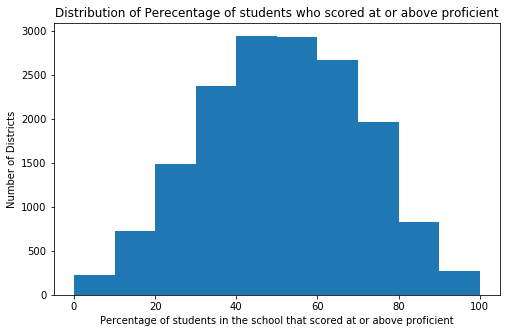

In [105]:
plt.figure(figsize=(8,5))
plt.hist(language_df['ParsedScores'])
plt.xlabel('Percentage of students in the school that scored at or above proficient')
plt.ylabel('Number of Districts')
plt.title('Distribution of Perecentage of students who scored at or above proficient')
plt.show()
plt.show()